# Barkley Sound Phytoplankton Bloom - Summer 2025

In this notebook you will learn about the Coccolithophore bloom in Barkley Sound that occurred during the summer months of 2025. 

This notebook is it ended for users with a basic competency in Python and with exposure to the ONC API as well as the pandas and matplotlib libraries for data analysis and visualization. Upon completion users will have experience with:

- Using their token to connect to the ONC API

- Making API requests using the ONC client library

- Accessing and filtering ocean sensor data using Python

- Plotting a phytoplankton bloom and comparing it to oceanographic parameters

- Connecting data with real world phenomenon (i.e., upwelling)

<img src="(4) Barkley Sounds Phyto Bloom files/phyto_bloom_LynetteDawson.jpg" width="" align="" />

Photo of the Coccolithophore bloom in Barkley Sound (above) and caption (below) by Lynette Dawson on July 1, 2025. 

"Coccolithorids are single-celled phytoplankton that produce calcium carbonate plates. (It has been suggested they do this to avoid predation by microzooplankton). The light reflects off the plates to produce this amazing colour. They are an important part of the biological pump, and a carbon sink. However when a bloom is too dense it may decrease nutrient flow to lower levels of the ocean."

This bloom is also visible from space, as evident in the this satellite image from July 6, 2025.

<img src="(4) Barkley Sounds Phyto Bloom files/barkley_sound_dfo_photo.png" width="" align="" />

Satellite image captured by DFO on July 6, 2025.

## Challenge - Recreate this Plot

Let's take a look at two key ocean properties that have a strong relationship with the coccolithophore bloom; oxygen and chlorophyll. Your challenge is to recreate the subplot below, using the skills you have developed in the Plotting Tutorial and Glossary notebooks. 

Feel free to follow the steps outlined below the plot, or just try all on your own!

<img src="(4) Barkley Sounds Phyto Bloom files/to_recreate.png" width="" align="" />

## Suggested Steps to Follow

1. Set Up Programming Environment

2. Connect to API

3. Request Data for Each Property

4. Make Individual DataFrames for Each Property

5. Merge DataFrames

6. Plot the Data

### Resources

For extra guidance please reference the pandas and matplotlib documentation, as well as the Plotting Tutorial and Glossary notebooks moving forwards. Any functions mentioned in the suggested steps have hyper links to their specific documentation.

> In any general syntax and code blocks look for parameters in capital letters. This means you need to replace the parameter with your own.

### i. Set Up Programming Environment

The code below uses pip to install the libraries listed in the requirements.txt file. 

In [1]:
!pip install -r ./requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


This next code imports the onc, pandas, and matplotlib libraries, which we will use in this notebook.

In [2]:
import onc 
import pandas as pd
from datetime import datetime

### ii. Connect to the API

Because the syntax here can be confusing, here is a general template for connecting to the ONC API using your personal token. Simply replace the placeholder with your token to connect.

In [4]:
ONC_CLIENT = onc.ONC(token=os.environ['GRACE_TOKEN'])

In the code above we create a variable called ONC_CLIENT. This variable points to an instance of the ONC class, which is defined in the onc library, and holds your connection with the API. 

You can find your token by logging into https://data.oceannetworks.ca/, viewing your profile, and clicking the Web Services API tab.

<img src="(4) Barkley Sounds Phyto Bloom files/onc_token_summer_bloom.png" width="" align="" />

Moving forward, you can now use client library calls like getScarlardata by prefixing the call with ONC_CLIENT..

### iii. Request Data

> You need to end this step with one API response from getScalardata for chlorophyll and another for oxygen.

Make two API requests using the getScalardata call — one for chlorophyll and one for oxygen. 

First, define a dictionary of parameters for each request with the following fields:

PROPERTY_NAME_PARAMETERS = {
    "locationCode": "LOCATION CODE HERE",
    "deviceCategoryCode": "DEVICE CATEGORY CODE HERE",
    "propertyCode": "PROPERTY CODE HERE",
    "dateFrom": "START TIME HERE", # Use ISO 8601 format 
    "dateTo": "END TIME HERE",
    "resamplePeriod": 1800,
    "resampleType": "avg",
    "metadata": "minimum",
    "qualityControl": "clean"
}

Notice that this is different from the Plotting Tutorial (section 2.1) where we requested data for an entire sensor, then chose a property from within it. Here you should specify propertyCode as a parameter, and thus only receive the information for that property.

In [5]:
# REMOVE BLOCK FOR STUDENT VERSION
chlr_parameters = {
    "locationCode": "FGPPN",
    "deviceCategoryCode": "FLNTU",
    "propertyCode": "chlorophyll",
    "dateFrom": "2025-01-01T00:00:00.000Z",
    "dateTo": "2025-10-01T00:00:00.000Z",
    "resamplePeriod": 1800,
    "resampleType": "avg",
    "metadata": "minimum",
    "qualityControl": "clean"
}

In [6]:
# REMOVE BLOCK FOR STUDENT VERSION
oxy_parameters = {
    "locationCode": "FGPPN",
    "deviceCategoryCode": "OXYSENSOR",
    "propertyCode": "oxygen",
    "dateFrom": "2025-01-01T00:00:00.000Z",
    "dateTo": "2025-10-01T00:00:00.000Z",
    "resamplePeriod": 1800,
    "resampleType": "avg",
    "metadata": "minimum",
    "qualityControl": "clean"
}

Next, use each of dictionary of parameters with the ONC client library function getScalardata to make each request.

General syntax: PARAMETER_NAME_API_RESPONSE = ONC_CLIENT.getScalardata(filters=PROPERTY_NAME_PARAMETERS)

In [7]:
chlr_response = ONC_CLIENT.getScalardata(filters=chlr_parameters)

In [8]:
oxy_response = ONC_CLIENT.getScalardata(filters=oxy_parameters)

### iv. Make Individual DataFrames

> You need to end this step with two data frames with the following columns: [timestamp, chlorophyll] and [timestamp, oxygen]. The timestamp column should hold datetime objects not strings. 

Now you should have the two API responses. Your next step is to create two individual DataFrames— one for each property you requested. 

#### API Response sensorData Section Review

Recall from the Plotting Tutorial (section 4) that the sensorData section of a getScalardata response is dictionary. One of the elements in this dictionary is the sensorData section which is a list of dictionaries, where each dictionary holds the information for a property in the API response. These notebooks refer to each of these dictionaries as a data entry. 

Also recall that each data entry further contains the data and metadata that you need for plotting a single property. 

These sections of each data entry include:

-  sampleTimes and values which contain the actual data to plot

-  sensorName and unitOfMeasure which contain the meta data you will use to label the plot

Example

The block below contains an example of the sensorData section of an getScalardata response for a CTD. Notice it contains a data entry for sea water temperature. You can reference this to determine how to isolate each of the sub sections mentioned above.

"sensorData": [
    {
      "actualSamples": 60,
      "data": 
          {
            "qaqcFlags: [...],
            "sampleTimes": [
                "2023-11-23T00:00:00.874Z",
                …
            ],
            "values": [
                10.064,
                …
            ]
          },
      "outputFormat": "array",
      "propertyCode": "seawatertemperature",
      "sensorCategoryCode": "temperature",
      "sensorCode": "Temperature",
      "sensorName": "Temperature",
      "unitOfMeasure": "C"
    }
    {
     *another data entry for a property collected by the same sensor*
    }
]

For more information on the getScalardata API response structure please reference the OpenAPI Scalar Data call. At the bottom of the page you can find a more complete example of a response, as well as a schema, which explains each piece of the response.

#### iv.i Isolate sensorData Section

Recall your objective is to create a DataFrame from each of your API responses. 

Thus, looking each API response, your first step is to isolate and define a variable to hold each sensorData section.

Like a dictionary, each section name in the API Response is a key, and can be used to access it's corresponding value using the same square bracket notation The general syntax is value = dictionary_name[key].

In [9]:
flourometer_sensorData = chlr_response["sensorData"]
oxysensor_sensorData = oxy_response["sensorData"]

#### iv.ii Isolate Data Entry

Next, looking at each sensorData section, define a variable to hold the first (and only) data entry for each property.

In [10]:
chlr_data_entry = flourometer_sensorData[0]
oxy_data_entry = oxysensor_sensorData[0]

HINT: Say you have an API response called called temp_response. The following code isolates the first data entry in the sensorData section of the response: temp_data_entry = temp_response["sensorData"][0]. The '["sensorData"]' extracts the entire sensorData section while the '[0]' isolates the first data entry in the sensorData list. * See example response above.

#### iv.ii Isolate Data and Metadata

Next, isolate and define variables to hold the relevant sub sections from the data entries you've just isolated. Use the same syntax, but take note that the sampleTimes and values sections are further nested in the data section of each data entry in the API response.

In [11]:
timestamps = chlr_data_entry["data"]["sampleTimes"]
values = chlr_data_entry["data"]["values"]

chlr_name = chlr_data_entry["sensorName"]
chlr_unit = chlr_data_entry["unitOfMeasure"]

In [12]:
timestamps = oxy_data_entry["data"]["sampleTimes"]
values = oxy_data_entry["data"]["values"]

oxy_name = oxy_data_entry["sensorName"]
oxy_unit = oxy_data_entry["unitOfMeasure"]

HINT: Say you have a data entry for temperature called temp_data_entry. The following code isolates the sampleTimes section of the data entry: timestamps = temp_data_entry["data"]["sampleTimes"].* See example response above.

iv.iii Create each data frame

Finally, create a DataFrame for each property (two total), each with the following columns: [timestamp, chlorophyll] and [timestamp, oxygen]. The timestamp column should hold the variable you defined for sampleTimes and the property column should hold the variable you defined for values.

The general syntax for creating and populating a data frame using the Pandas DataFrame function is as follows:

DATAFRAME_NAME = pd.DataFrame({
    "COLUMN_NAME_1": DATA_SEQUENCE_1,
    "COLUMN_NAME_2": DATA_SEQUENCE_2,
    "COLUMN_NAME_3": DATA_SEQUENCE_3,
    # ... additional columns as needed
})

As you populate the DataFrame columns you should also convert the variable you defined for sampleTimes to datetime object using the  Pandas to_datetime function, as they are initially strings. This then allows you sort the DataFrame according to this column, ensuring the DataFrame is sorted by time.

In [13]:
chlr_df = pd.DataFrame({
    "timestamp": pd.to_datetime(timestamps),
    "chlorophyll": values
})

In [14]:
oxy_df = pd.DataFrame({
    "timestamp": pd.to_datetime(timestamps),
    "oxygen": values
})

Feel free to display each DataFrame to better visualize what you've just created. Recall you do this by writing the name of the DataFrame in a code block.

### v. Merge DataFrames

> You need to end this step with a single DataFrame that contains the columns [timestamp, chlorophyll, oxygen]. The DataFrame should be sorted by the timestamp column.

Now that you have two DataFrames, it is time to combine them by merging them on their common column— timestamp. The concept of merging is similar to an SQL join, and in our case, more specifically a full outer join on the timestamp column. This will produce a new DataFrame that includes all the timestamps from your oxygen and chlorophyll DataFrames; when only one DataFrame has a row for a given timestamp, the other DataFrame's fields become NaN (stands for not a number), and where both have the same timestamp, they are combined into one row.

Merge your data using the Pandas merge function. The general syntax is: 

MERGED_DATAFRAME_NAME = pd.merge(left=DATAFRAME_NAME_1, right=DATAFRAME_NAME_2, on="COLUMN_NAME", how="outer")

Remember, the timestamp column should contain datetime objects.

In [15]:
merged_df = pd.merge(left=chlr_df, right=oxy_df, on="timestamp", how="outer")

Next ensure that your new DataFrame is correctly sorted according to the timestamp column using the Pandas sort_values function.

General syntax: MERGED_DATAFRAME_NAME.sort_values(by="COLUMN_NAME", inplace=True)

In [16]:
merged_df.sort_values(by="timestamp", inplace=True)

Finally, display your new DataFrame.

In [17]:
merged_df

,timestamp,chlorophyll,oxygen
0,2025-01-01 00:15:00+00:00,5.547506,5.547506
1,2025-01-01 00:45:00+00:00,5.525520,5.525520
2,2025-01-01 01:15:00+00:00,5.493677,5.493677
3,2025-01-01 01:45:00+00:00,5.506988,5.506988
4,2025-01-01 02:15:00+00:00,5.525585,5.525585
...,...,...,...
13045,2025-09-30 21:45:00+00:00,3.022868,3.022868
13046,2025-09-30 22:15:00+00:00,3.081358,3.081358
13047,2025-09-30 22:45:00+00:00,3.038006,3.038006
13048,2025-09-30 23:15:00+00:00,3.086259,3.086259


### vi. Plot the Data

> Write the code for the rest of the plotting section in a single code block. 

Reference documentation and examples from matplotlib if you need guidance.

To start you off, here is the code to import the suggested plotting library and modules.

In [18]:
import matplotlib.pyplot as plt      # Module of matplotlib for plotting
import matplotlib.dates as mdates    # Module of matplotlib for handling dates

#### vi.i Create a Figure and Set of Subplots 

Use the matplotlib subplots function to create the fig (figure), which is the overall canvas where all plots are drawn, and the axes, which each represents one individual plot area inside that figure.

General Syntax: fig, axes = plt.subplots(NUMBER_OF_ROWS, NUMBER_COLUMNS, figsize=(WIDTH, HEIGHT))

#### vi.ii Plot Each Property

For each axis i in axes the general syntax for subplotting using the matplotlib Axes.plot function is:

axes[i].plot(
    dataframe["TIMESTAMP COLUMN"],
    dataframe["VALUE COLUMN"],
    color="SOME COLOR",
    linewidth=LINE_THICKNESS,
    label="LABEL TEXT"
)
axes[i].set_ylabel("Y AXIS LABEL")
axes[i].set_title("PLOT TITLE")
axes[i].set_xlabel("X AXIS LABEL")

Plot one property per axis. Remember to start at axes[0] for the first property.

#### vi.iii Apply Shared Formatting to Both Subplots

There are many ways to format plots, but the main idea is that you can loop over each axis and apply common styling so your subplots look consistent. Since your x-axis contains datetime values, you can also define a DateFormatter to control how those dates appear (for example, “Jan 14” or “2025-01-14”).

The general pattern is as follows:

date_format = mdates.DateFormatter("DESIRED FORMAT")

# Apply shared formatting to each axis
for ax in axes:
    ax.grid(True, linestyle="--", alpha=0.5)       # Add gridlines
    ax.tick_params(axis="both", labelsize=8)       # Format tick labels
    ax.legend()                                    # Show legend if defined
    ax.xaxis.set_major_formatter(date_format)      # Apply date formatting to x-axis

#### vi.iii Apply Shared Formatting for Both Subplots

Use the matplotlib suptitle function to set a title for the entire figure. Select font characteristics and position on the figure.

#### vi.v Adjust Space if Needed

Use the matplotlib subplots_adjust function to adjust the spacing around your subplots.

#### vi.vi Apply Tight Layout

Try out the matplotlib tight_layout function to see how it affects your spacing.

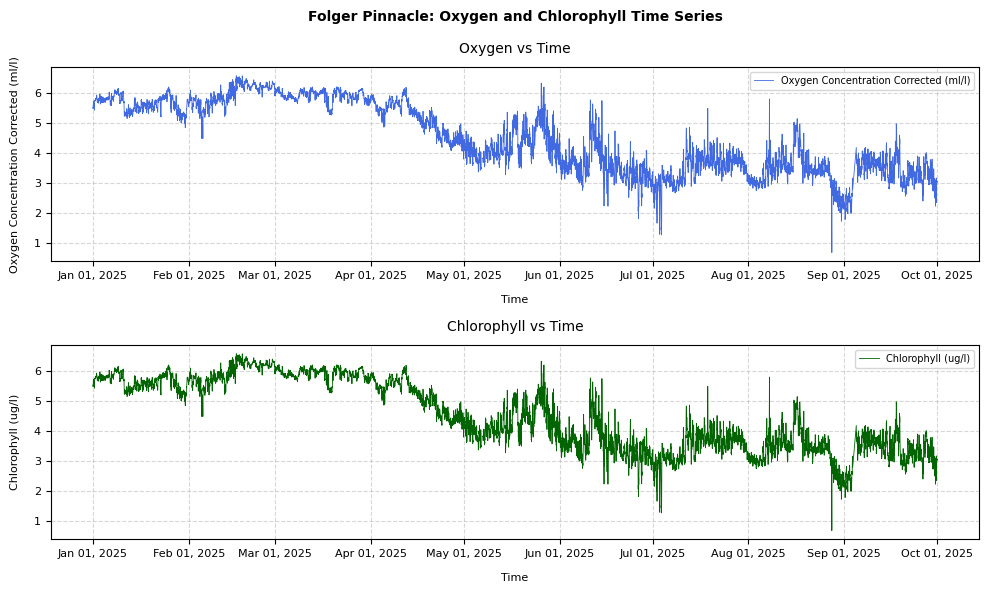

In [20]:
# ----------------- Create figure -----------------
fig, axes = plt.subplots(2, 1, figsize=(10, 6)) # Two stacked subplots, independent x-axes

# ----------------- Plot each -----------------
# Oxygen subplot
axes[0].plot(
    merged_df["timestamp"],
    merged_df["oxygen"],
    color="royalblue",
    linewidth=0.6,
    label=f"{oxy_name} ({oxy_unit})"
)
axes[0].set_ylabel(f"{oxy_name} ({oxy_unit})", fontsize=8, labelpad=10)
axes[0].set_title("Oxygen vs Time", fontsize=10, pad=10)
axes[0].set_xlabel("Time", fontsize=8, labelpad=10) 

# Chlorophyll subplot 
axes[1].plot(
    merged_df["timestamp"],
    merged_df["chlorophyll"],
    color="darkgreen",
    linewidth=0.6,
    label=f"{chlr_name} ({chlr_unit})"
)
axes[1].set_ylabel(f"{chlr_name} ({chlr_unit})", fontsize=8, labelpad=10)
axes[1].set_title("Chlorophyll vs Time", fontsize=10, pad=10)
axes[1].set_xlabel("Time", fontsize=8, labelpad=10) 

# ----------------- Shared formatting for all subplots -----------------
date_format = mdates.DateFormatter("%b %d, %Y")  # e.g., Jan 01, 2025
for ax in axes:
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.tick_params(axis="both", labelsize=8)
    ax.legend(fontsize=7)
    ax.xaxis.set_major_formatter(date_format)
    for label in ax.get_xticklabels():
        label.set_ha("center")

# ----------------- Add overall title -----------------
fig.suptitle("Folger Pinnacle: Oxygen and Chlorophyll Time Series", fontsize=10, fontweight="bold", x=0.52)

# ----------------- Adjust space if needed -----------------
plt.subplots_adjust(hspace = 0.3)

# ----------------- Apply tight layout -----------------
plt.tight_layout()

### Good Job!

Don't worry if you didn't perfectly recreate the plot. Coding isn't easy! 

This next section contains a more complicated plot but all you'll need to do is provide your token.

<hr>

# More Considerations

Let's take a look at several other phenomena and biological oceanographic health indicators to get more context on the events in Barkley Sound. 

First, let's plot a few more properties. For the next plot we will use the helper file summer_helper.py which does all of the work of calling ONC_client.py and onc_plotting.py— simply enter your token in the input box below so that the file can fetch data from ONC's database.

In [21]:
token = ''

In [25]:
from summer_helper import fetch_and_plot_summer_data     # External file with helper functions

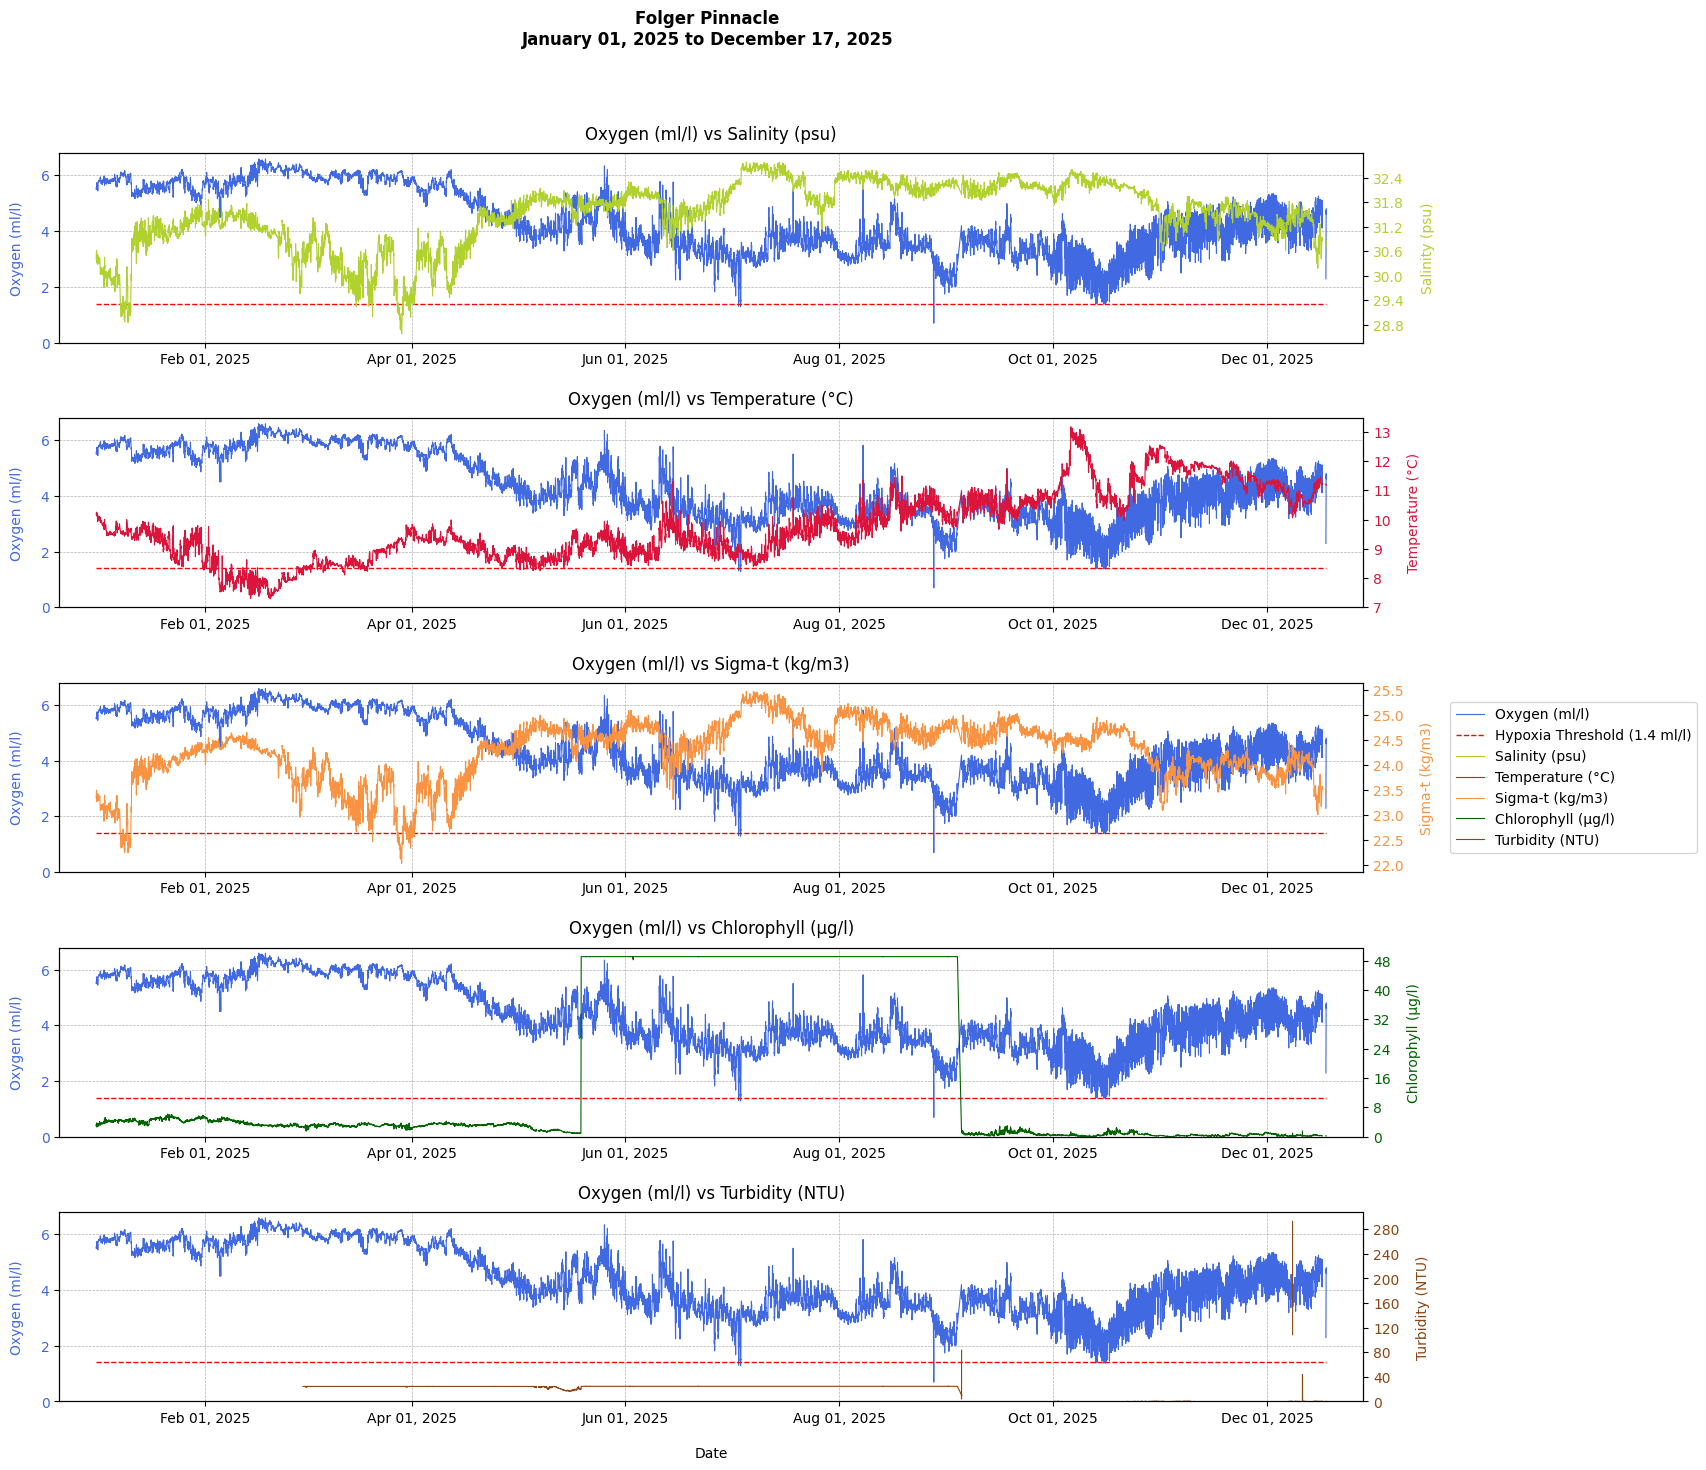

In [28]:
fetch_and_plot_summer_data(token=token)

## Upwelling

Folger Deep is a useful site to observe the timing of upwelling along the shelf. Upwelling is a natural phenomenon that brings colder, saltier, low oxygen, nutrient-rich water to the surface and in this case, into the mouth of Barkley Sound. This surge in nutrients often causes a rapid increase in phytoplankton populations, also known as a bloom. The graphic below shows the typical upwelling dynamic off the coast of Bamfield. Notice how the wind is moving along the coast towards the south. Due to Ekman transport and the Coriolis force, the surface waters move offshore towards the west, creating space for water from the deep to flow upwards and fill the gap. 

<img src="(4) Barkley Sounds Phyto Bloom files/upwelling_diagram.png" width="" align="" />

Using our profile graphic of Folger Pinnacle and Folger Deep, we can overlay the same atmosphere and ocean dynamics to see how upwelling is happening at our station location. In this graphic, the land is on the left hand side. Notice the wind direction is the same; headed to the south, coming from the north. The surface currents are also being transported West, away from land, allowing the bottom water to be upwelled to the surface. Lets see what this looks like in the data.

<img src="(4) Barkley Sounds Phyto Bloom files/folger_passage_upwelling_diagram.png" width="" align="" />

The state of the ocean (SOO) plot below highlights 2025 data (pink) compared to a sixteen year average (2009-2024; black) for four different parameters, Oxygen, sigma-t, salinity and temperature. Notice how the 2025 data (pink) changes from low to high salinity and high to low temperature compared to the 2009-2024 average (black)? This is a sign of upwelling bringing colder, saltier water up. 

<img src="(4) Barkley Sounds Phyto Bloom files/FGPD_StateOfOcean.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=925b81e8-0463-4b76-8568-a11fbcf77052' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>